# Comparison of stock KPP with LES for 4 canonical cases

In this notebook we compare KPP with LES data for the four canonical cases:

1. Free convection
2. Wind-driven shear mixing with neutral buoyancy forcing
3. Wind-driven shear mixing with destabilizing buoyancy forcing
4. Wind-driven shear mixing with stabilizing buoyancy forcing

In [6]:
using Pkg; Pkg.activate("..")

using ColumnModelOptimizationProject.KPPOptimization, Printf

datadir = joinpath("..", "data", "idealized")

cases = ["free_convection", "shear_neutral", "shear_unstable", "shear_stable"]

dirs = Dict((c, joinpath(datadir, c)) for c in cases)

examples = Dict(
    "free_convection" => "wind_stress_N256_tau0_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_neutral"   => "wind_stress_N256_tau0.1_Q0_dTdz0.001_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_unstable"  => "wind_stress_N256_tau0.1_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_stable"    => "wind_stress_N256_tau0.04_Q10_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2" )

examplepaths = Dict((c, joinpath(dirs[c], examples[c])) for c in cases)

Dict{String,String} with 4 entries:
  "shear_unstable"  => "../data/idealized/shear_unstable/wind_stress_N256_tau0.…
  "shear_stable"    => "../data/idealized/shear_stable/wind_stress_N256_tau0.04…
  "free_convection" => "../data/idealized/free_convection/wind_stress_N256_tau0…
  "shear_neutral"   => "../data/idealized/shear_neutral/wind_stress_N256_tau0.1…

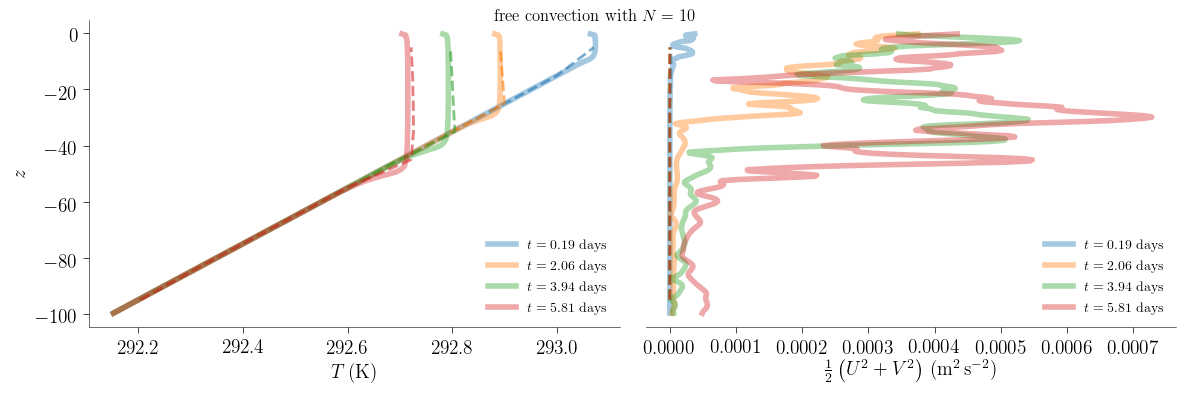

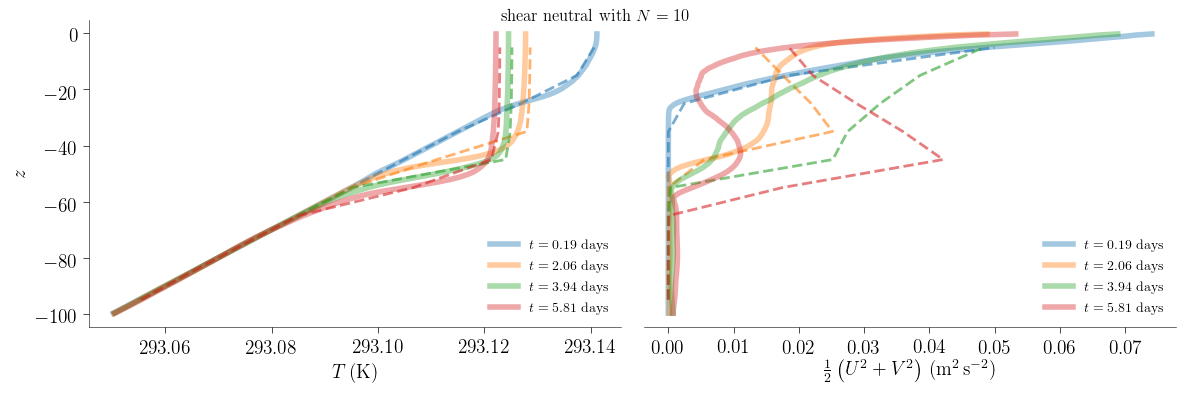

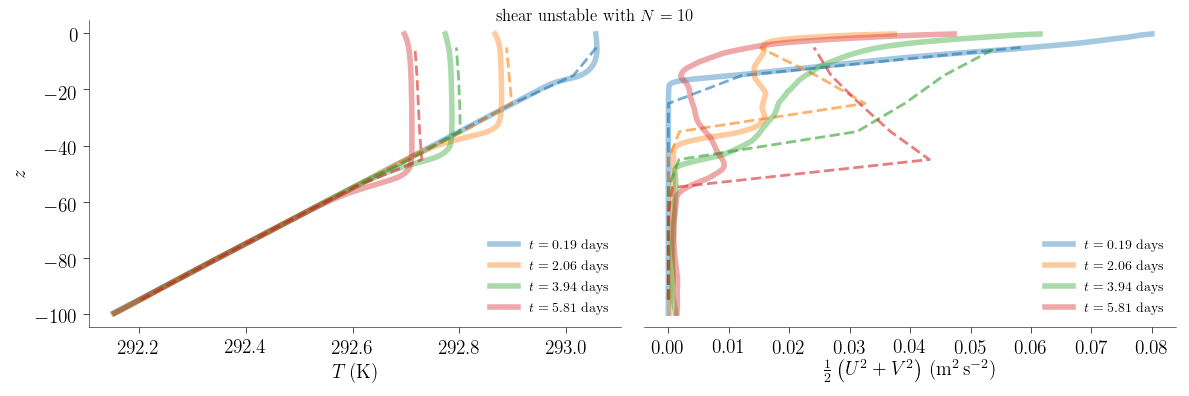

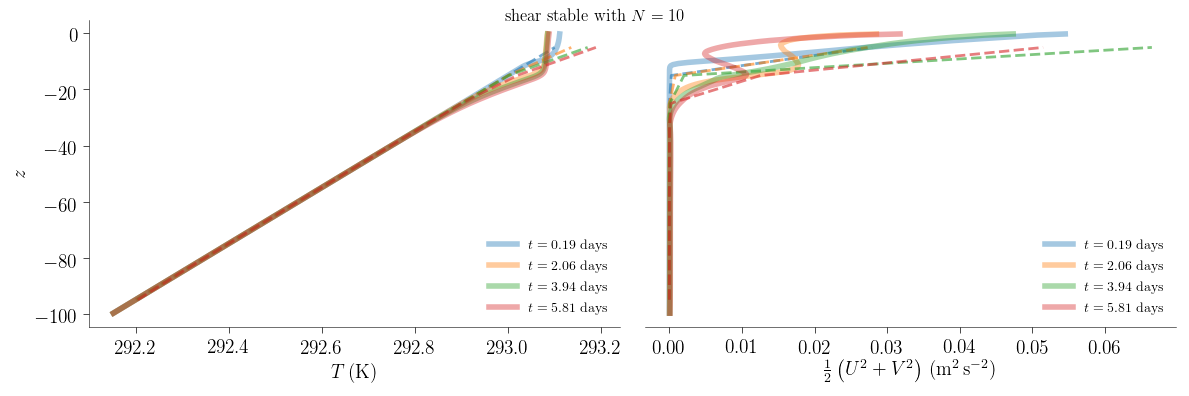

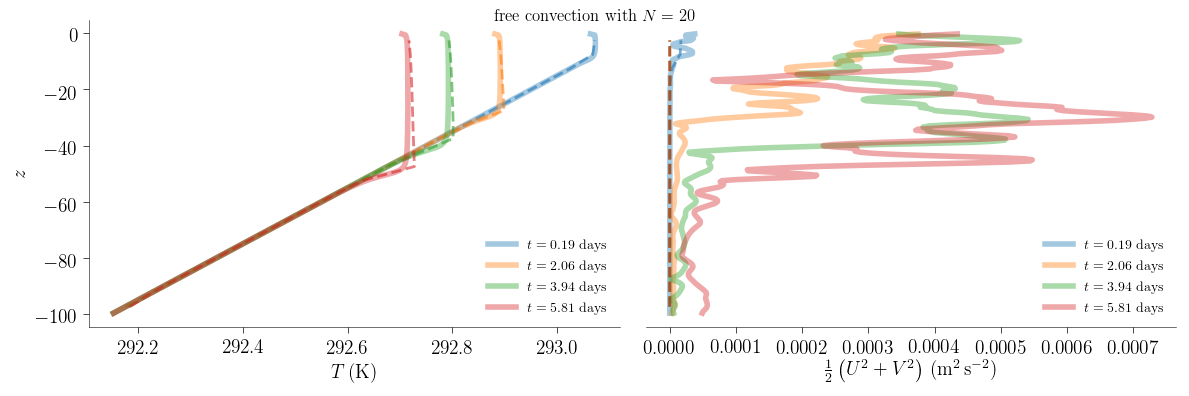

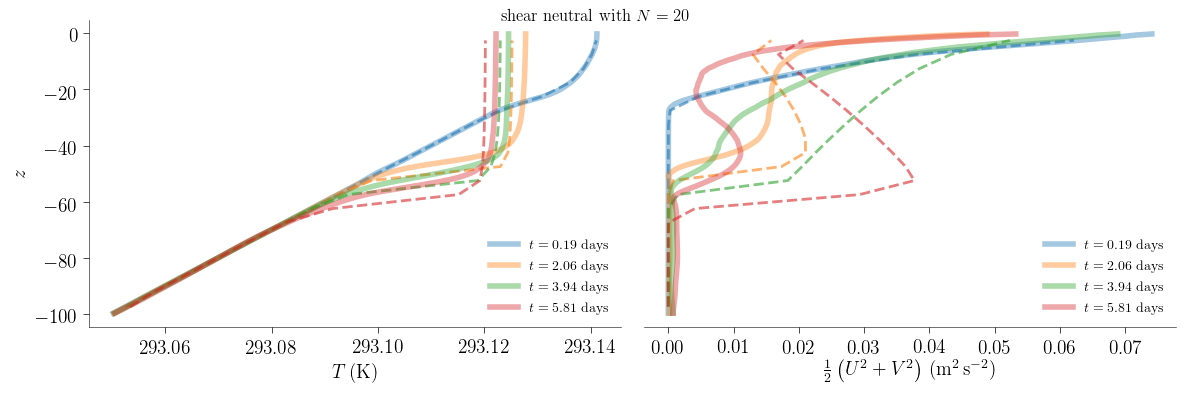

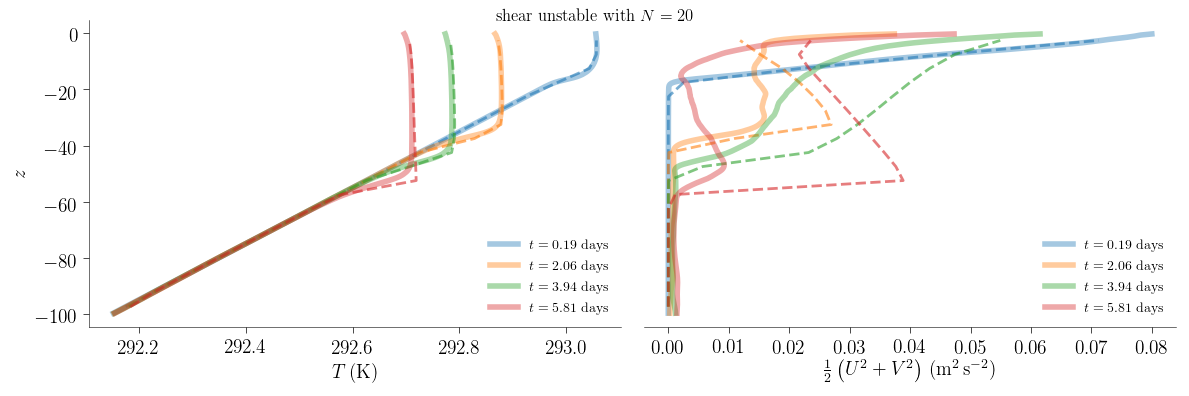

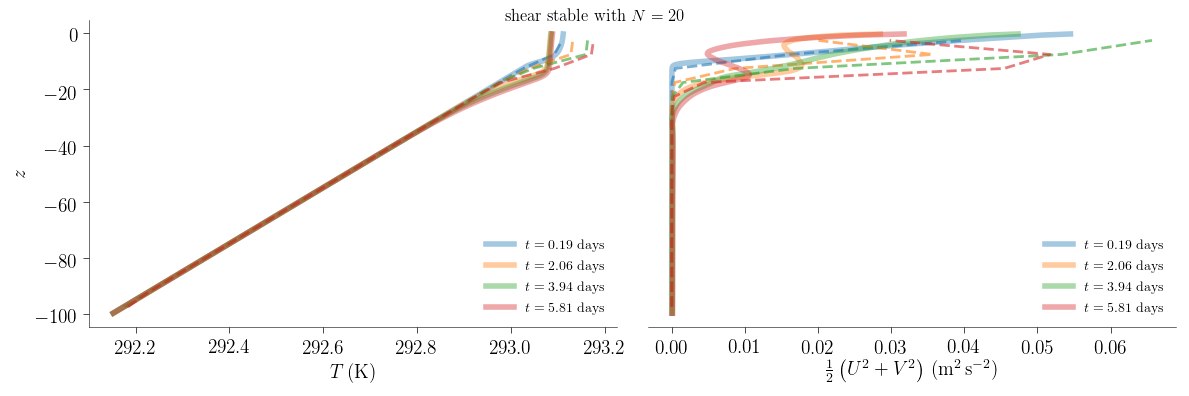

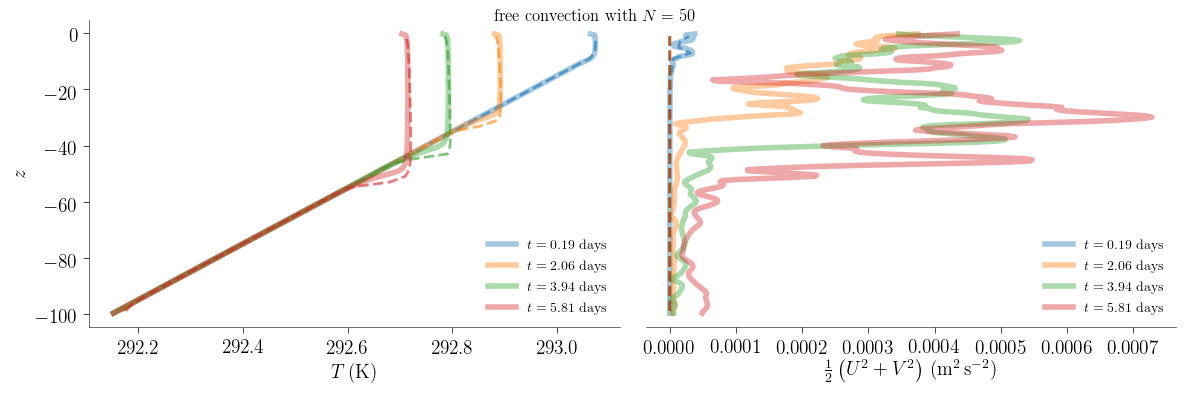

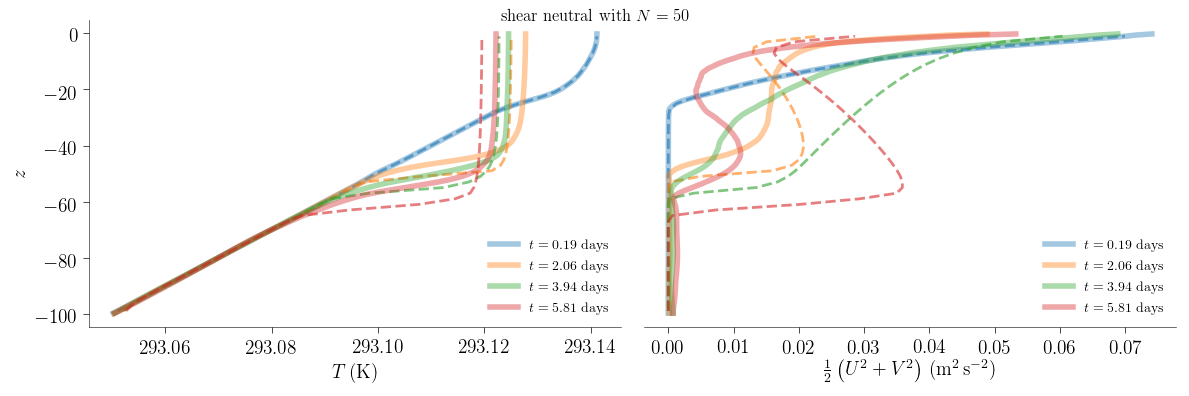

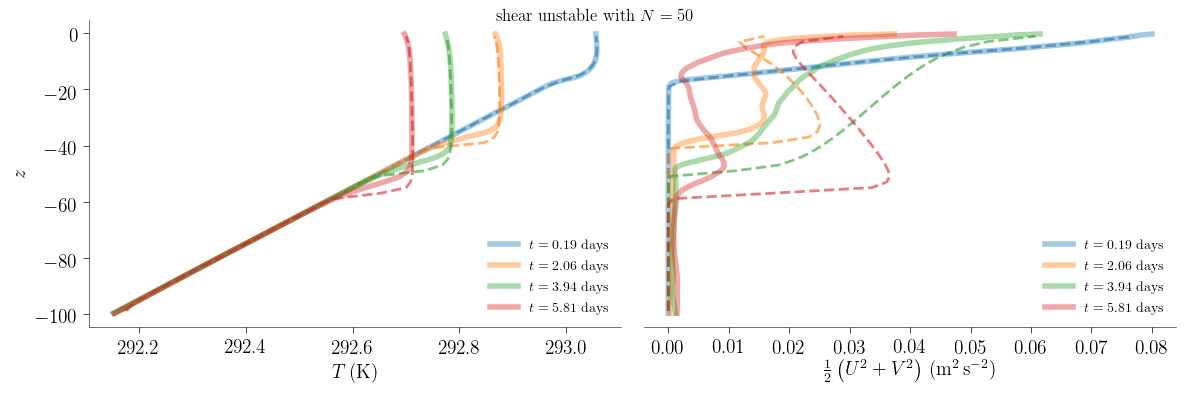

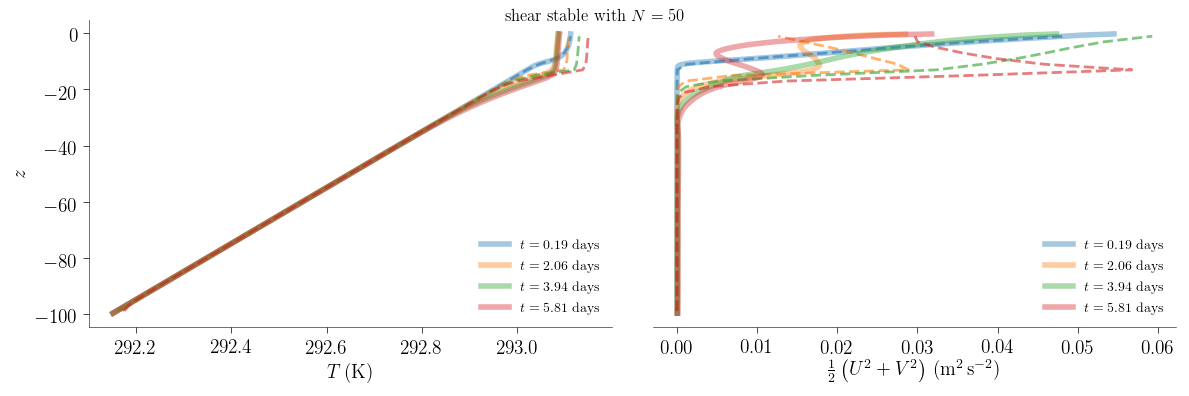

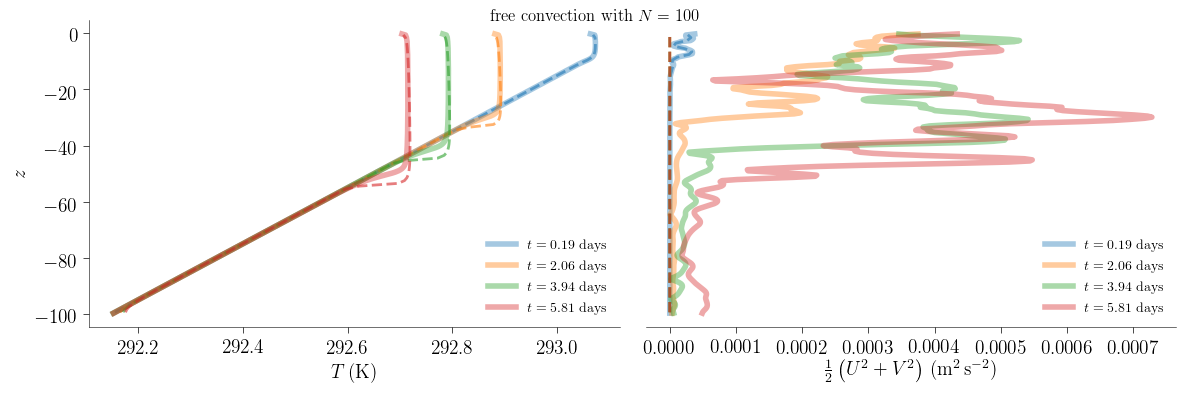

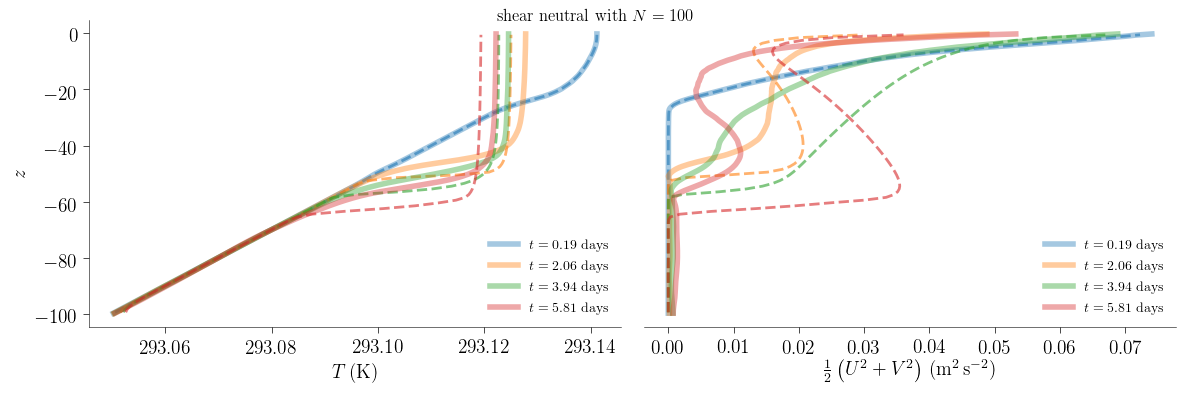

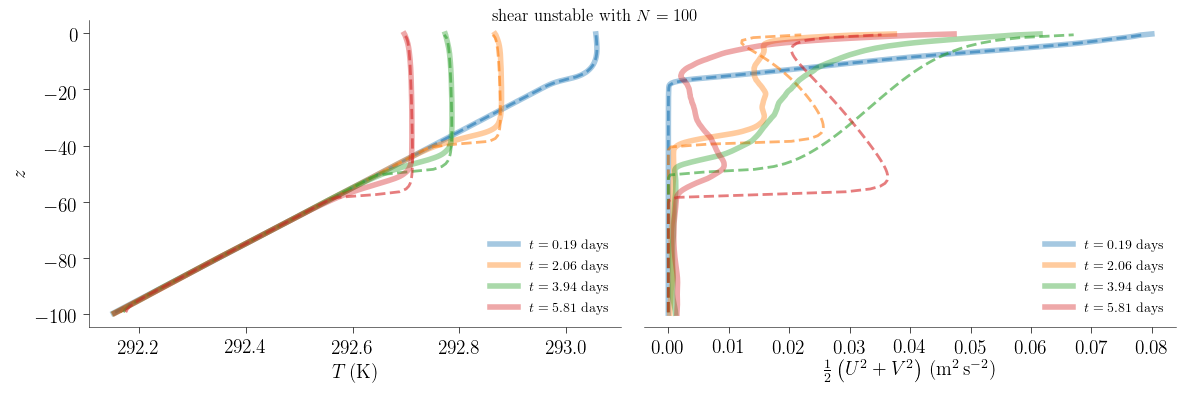

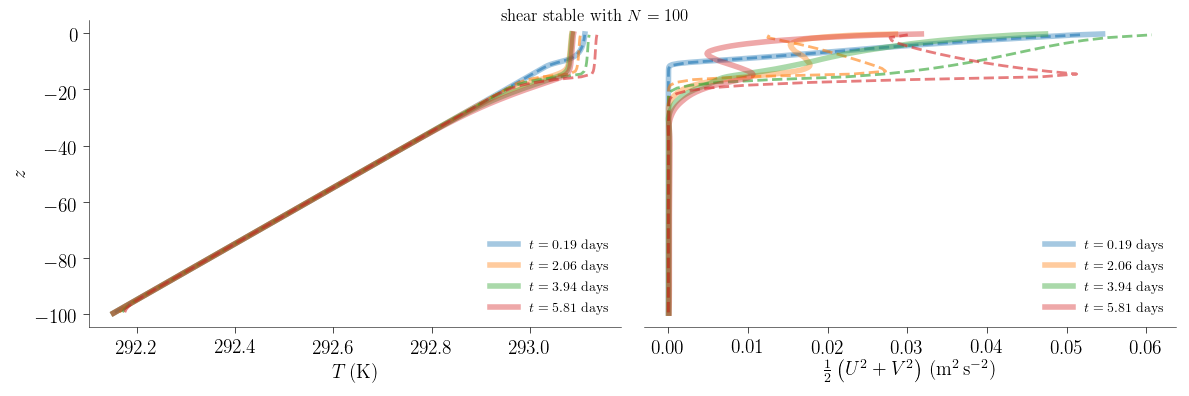

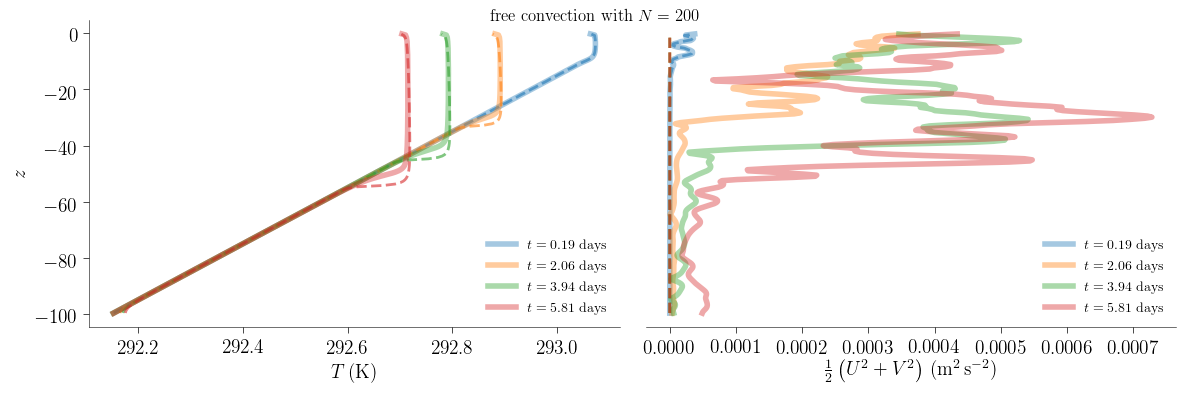

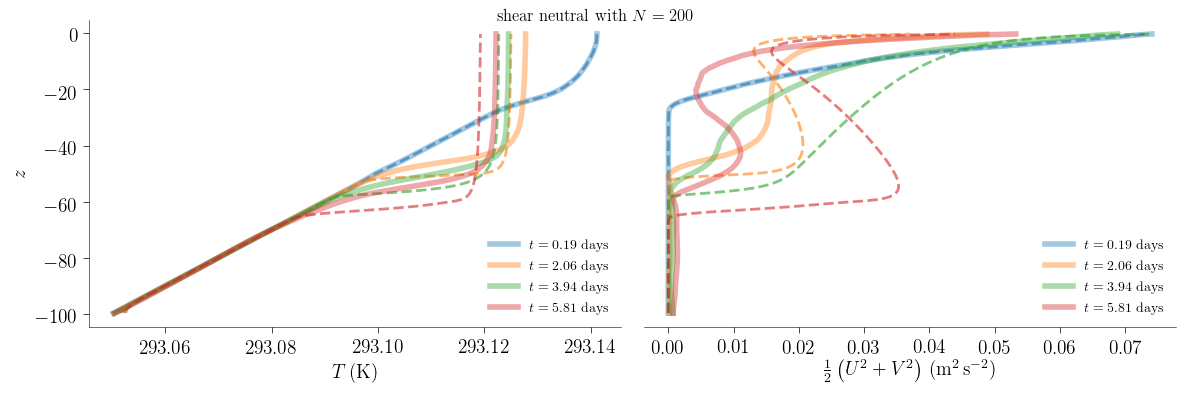

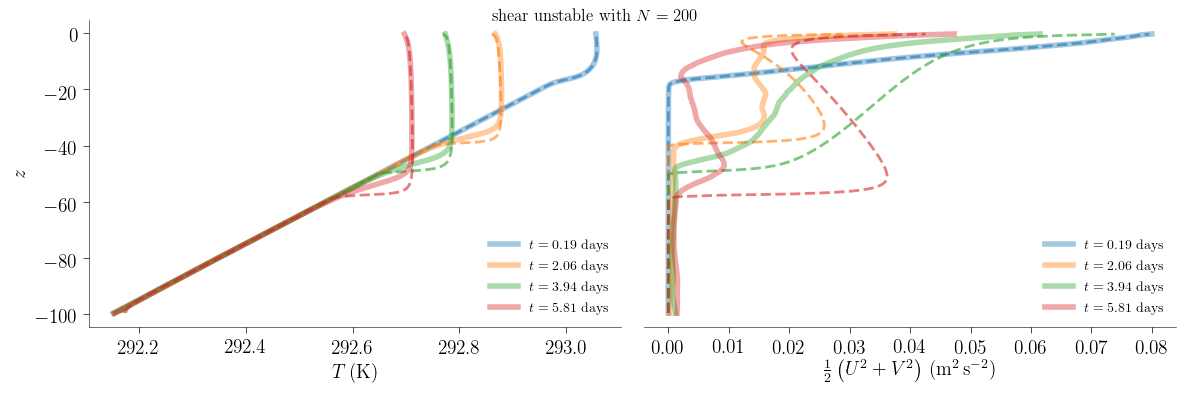

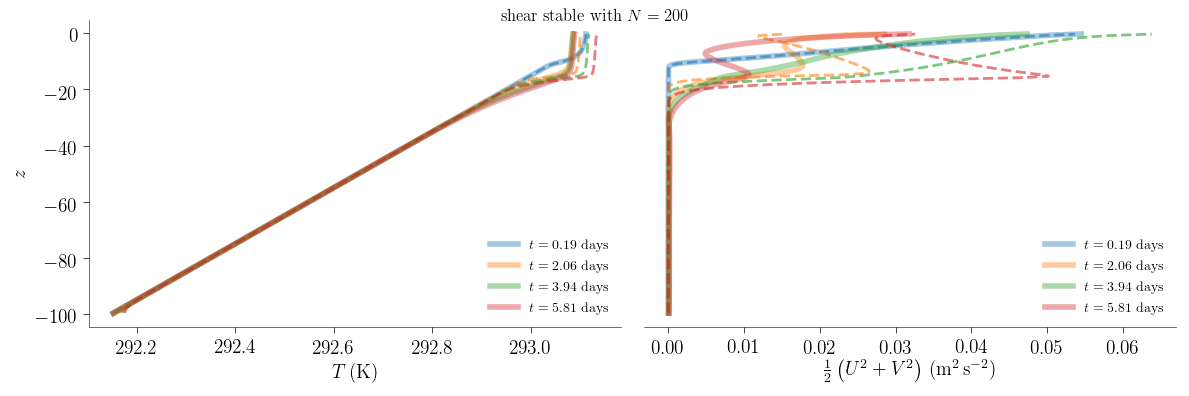

In [9]:
for N in [10, 20, 50, 100, 200]
    for case in cases
        fig, axs = visualize_compare_with_data(examplepaths[case], N=N)
        fig.suptitle(replace(case, "_" => " ") * @sprintf(" with \$ N = %d \$", N))
        fig.tight_layout()
        fig.savefig(joinpath("..", "assets", case * "_kpp_les_comparison_N$N.png"), dpi=480)
    end
end